# **Customer Segmentation and Shopping Behavior Analysis** & **Customer Segmentation and Shopping Behavior Analysis**

## **1. Introduction**

This project aims to analyze customer purchasing behavior and segment customers based on their transaction data. By applying clustering techniques, I identify distinct customer groups and examine their purchasing frequency, spending patterns, and product diversity. These insights provide actionable recommendations for targeted marketing and customer retention strategies.

**Dataset:**  
The dataset contains transactional records including customer IDs, product quantities, prices, invoice details, purchase dates, and customer location information.

**Tools and Methods:**  
- Python libraries: Pandas, NumPy, Matplotlib, Seaborn, Plotly, Scikit-learn  
- Data preprocessing and feature engineering  
- K-Means clustering for segmentation  
- Time series and geographical analysis  
- Data visualization for detailed segment insights

## **2. Data Preparation**

- **Data Cleaning:** Removed missing or invalid records, handled duplicates, and ensured consistent data types.  
- **Feature Engineering:**  
  - `TotalSpend` calculated as the product of quantity and unit price.    
- **Dataset Structure:** Created a summary dataframe containing essential features for clustering and analysis.


In [86]:
#import libraries and csv
import pandas as pd
import pandas as pd

df = pd.read_csv(r'C:\Users\secki\Downloads\ecommerce_data.csv', encoding='latin1')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [87]:
#checking missing or null values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [89]:
#removing null values in CustomerID column
df = df.dropna(subset=['CustomerID'])

In [90]:
#removing null vvalues in Description column
df = df.dropna(subset=['Description'])

In [91]:
#second check after cleaning
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


       InvoiceNo StockCode                         Description       Quantity  \
count     406829    406829                              406829  406829.000000   
unique     22190      3684                                3896            NaN   
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq         542      2077                                2070            NaN   
mean         NaN       NaN                                 NaN      12.061303   
std          NaN       NaN                                 NaN     248.693370   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       2.000000   
50%          NaN       NaN                                 NaN       5.000000   
75%          NaN       NaN                                 NaN      12.000000   
max          NaN       NaN                                 NaN   80995.000000   

             InvoiceDate   

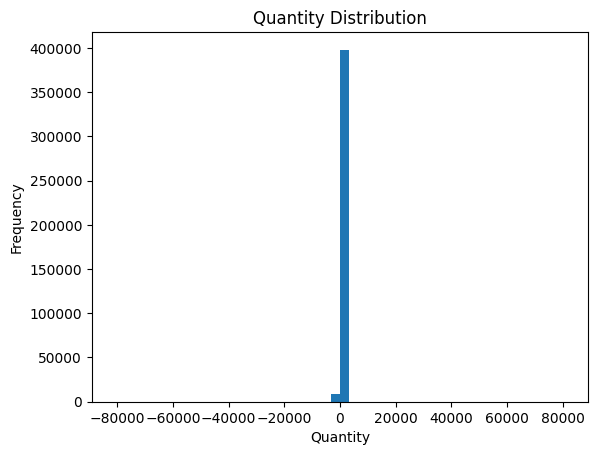

In [92]:
#checking negative quantity values 
print(df.describe(include='all'))
print(df['Country'].value_counts())

import matplotlib.pyplot as plt

plt.hist(df['Quantity'], bins=50)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


In [94]:
#cleaning negative quantity values
df_clean = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df_clean = df_clean[df_clean['CustomerID'].notnull()]

print(f"Orijinal veri sayısı: {len(df)}")
print(f"Temizlenmiş veri sayısı: {len(df_clean)}")

Orijinal veri sayısı: 406829
Temizlenmiş veri sayısı: 397884


In [96]:
#checking data types
print(df_clean.info())
print(df_clean.describe())

categorical_cols = df_clean.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col} unique values: {df_clean[col].nunique()}")

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB
None
            Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16

In [97]:
#converting InvoiceDate data dtype to date from object
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
print(df_clean['InvoiceDate'].head())
print(df_clean.info())

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB
None


In [98]:
#selecting categorical columns, applying one-hot encoding
categorical_cols = ['InvoiceNo', 'StockCode', 'Description', 'Country']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
print(df_encoded.shape)
print(df_encoded.head())

(397884, 26111)
   Quantity         InvoiceDate  UnitPrice  CustomerID  InvoiceNo_536366  \
0         6 2010-12-01 08:26:00       2.55     17850.0             False   
1         6 2010-12-01 08:26:00       3.39     17850.0             False   
2         8 2010-12-01 08:26:00       2.75     17850.0             False   
3         6 2010-12-01 08:26:00       3.39     17850.0             False   
4         6 2010-12-01 08:26:00       3.39     17850.0             False   

   InvoiceNo_536367  InvoiceNo_536368  InvoiceNo_536369  InvoiceNo_536370  \
0             False             False             False             False   
1             False             False             False             False   
2             False             False             False             False   
3             False             False             False             False   
4             False             False             False             False   

   InvoiceNo_536371  ...  Country_RSA  Country_Saudi Arabia  \
0

In [99]:
#droping unnecessary columns. Converting InvoiceDate to datetime and extracting date-time components as Y,M,D,H
df_reduced = df_clean.drop(['InvoiceNo', 'StockCode', 'Description'], axis=1)
df_reduced['InvoiceDate'] = pd.to_datetime(df_reduced['InvoiceDate'])

df_reduced['Year'] = df_reduced['InvoiceDate'].dt.year
df_reduced['Month'] = df_reduced['InvoiceDate'].dt.month
df_reduced['Day'] = df_reduced['InvoiceDate'].dt.day
df_reduced['Hour'] = df_reduced['InvoiceDate'].dt.hour

print(df_reduced.head())

   Quantity         InvoiceDate  UnitPrice  CustomerID         Country  Year  \
0         6 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   
1         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
2         8 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   
3         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
4         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   

   Month  Day  Hour  
0     12    1     8  
1     12    1     8  
2     12    1     8  
3     12    1     8  
4     12    1     8  


In [101]:
#grouping data by customer. Calculating aggregated metrics. Computing total spending.
df_summary = df_clean.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceNo': 'nunique'
}).reset_index()

df_summary['TotalSpend'] = df_summary['Quantity'] * df_summary['UnitPrice']

df_summary.rename(columns={'Quantity': 'TotalQuantity', 'InvoiceNo': 'NumTransactions'}, inplace=True)

print(df_summary.head())

   CustomerID  TotalQuantity  UnitPrice  NumTransactions    TotalSpend
0     12346.0          74215   1.040000                1  77183.600000
1     12347.0           2458   2.644011                7   6498.979011
2     12348.0           2341   5.764839                4  13495.487419
3     12349.0            631   8.289041                1   5230.384932
4     12350.0            197   3.841176                1    756.711765


In [102]:
#selecting specific columns. focusing on features for awnalysis.
features = ['TotalQuantity', 'UnitPrice', 'NumTransactions', 'TotalSpend']
df_features = df_summary[features]

print(df_features.head())

   TotalQuantity  UnitPrice  NumTransactions    TotalSpend
0          74215   1.040000                1  77183.600000
1           2458   2.644011                7   6498.979011
2           2341   5.764839                4  13495.487419
3            631   8.289041                1   5230.384932
4            197   3.841176                1    756.711765


In [103]:
#creating scaler object. Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

print(df_scaled[:5])

[[14.47303784 -0.10020528 -0.4250965   1.8349751 ]
 [ 0.25105757 -0.05331467  0.3544168   0.05192208]
 [ 0.22786859  0.03791758 -0.03533985  0.22841232]
 [-0.11104729  0.11170847 -0.4250965   0.01992119]
 [-0.19706453 -0.01831751 -0.4250965  -0.09292933]]


## **3. Customer Segmentation**

- Applied **K-Means clustering** to group customers based on spending and transaction behaviors.  
- Used the **Elbow Method** to determine the optimal number of clusters (**k=4**).  
- Assigned cluster labels to each customer and analyzed cluster centroids.  
- Cluster profiles:  
  - **Cluster 0:** High purchase frequency and total spend  
  - **Cluster 1:** Low frequency, fewer customers but high unit prices  
  - **Cluster 2:** Moderate spend and product diversity  
  - **Cluster 3:** Minimal data, single customers or outliers

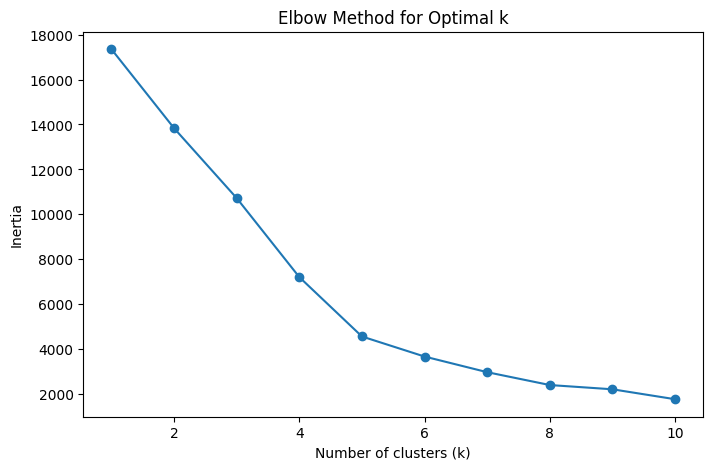

In [104]:
#using elbow method to determine the best number of clusters for KMeans by balancing model complexity and fit quality.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [105]:
#creating a Kmeans model according to Elbow Method results.
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df_summary['Cluster'] = clusters

print(df_summary.groupby('Cluster').mean())

           CustomerID  TotalQuantity    UnitPrice  NumTransactions  \
Cluster                                                              
0        15300.088120     642.533628     3.884814         3.028719   
1        15458.105263   58430.473684    31.794954        63.578947   
2        15283.036885    5901.434426     3.759266        20.426230   
3        17846.000000       1.000000  2033.100000         1.000000   

            TotalSpend  
Cluster                 
0          1869.062390  
1        362749.505636  
2         19486.670382  
3          2033.100000  


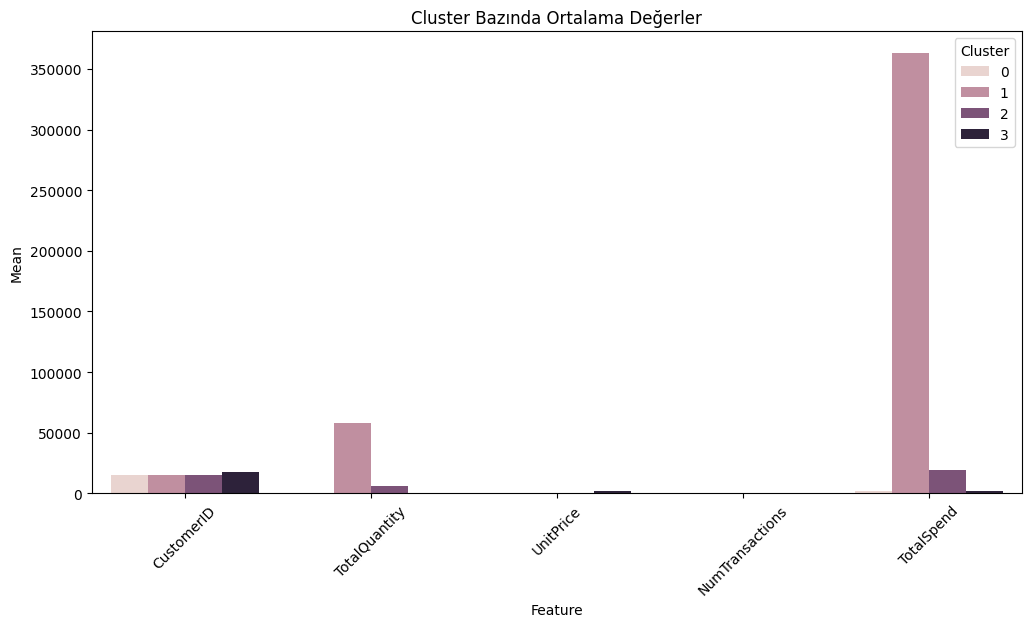

In [107]:
#calculating mean values per cluster.
import matplotlib.pyplot as plt
import seaborn as sns

cluster_means = df_summary.groupby('Cluster').mean().reset_index()

df_melted = cluster_means.melt(id_vars='Cluster', var_name='Feature', value_name='Mean')

plt.figure(figsize=(12,6))
sns.barplot(data=df_melted, x='Feature', y='Mean', hue='Cluster')
plt.title('Cluster Bazında Ortalama Değerler')
plt.xticks(rotation=45)
plt.show()

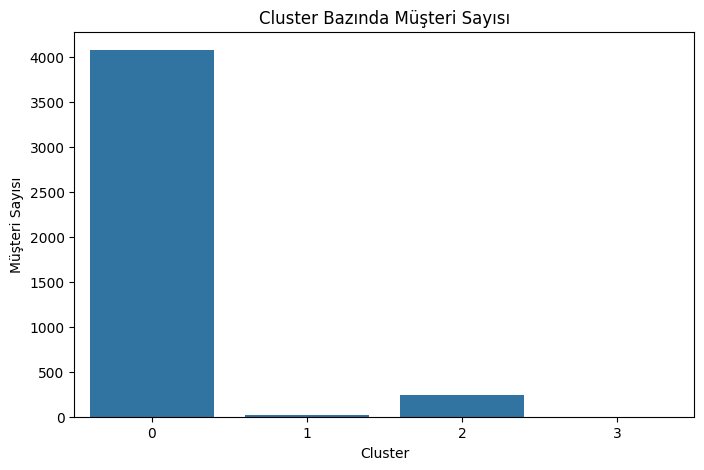

In [108]:
#distribution of customers across the different segments formed by K-Means clustering
plt.figure(figsize=(8,5))
sns.countplot(data=df_summary, x='Cluster')
plt.title('Cluster Bazında Müşteri Sayısı')
plt.xlabel('Cluster')
plt.ylabel('Müşteri Sayısı')
plt.show()

## **3. Customer Segmentation**

- Applied **K-Means clustering** to group customers based on spending and transaction behaviors.  
- Used the **Elbow Method** to determine the optimal number of clusters (**k=4**).  
- Assigned cluster labels to each customer and analyzed cluster centroids.  
- Cluster profiles:  
  - **Cluster 0:** High purchase frequency and total spend  
  - **Cluster 1:** Low frequency, fewer customers but high unit prices  
  - **Cluster 2:** Moderate spend and product diversity  
  - **Cluster 3:** Minimal data, single customers or outliers

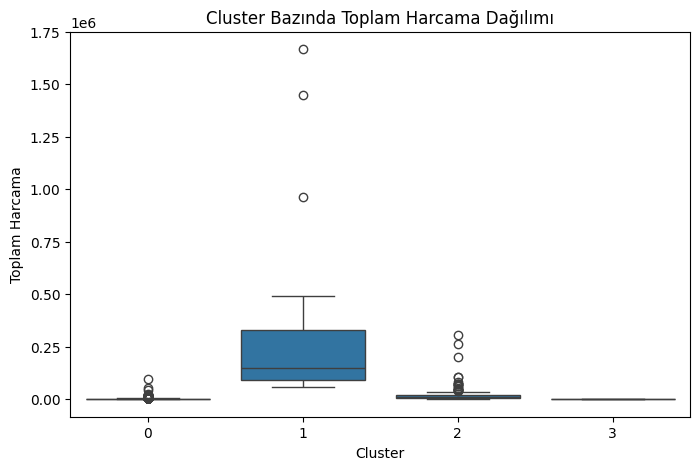

In [109]:
#distribution of total spend by cluster
plt.figure(figsize=(8,5))
sns.boxplot(data=df_summary, x='Cluster', y='TotalSpend')
plt.title('Cluster Bazında Toplam Harcama Dağılımı')
plt.xlabel('Cluster')
plt.ylabel('Toplam Harcama')
plt.show()

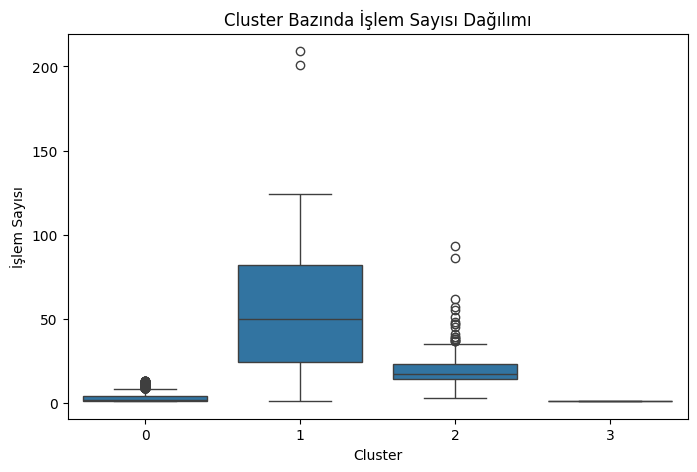

In [110]:
#distribution of total transactions by cluster
plt.figure(figsize=(8,5))
sns.boxplot(data=df_summary, x='Cluster', y='NumTransactions')
plt.title('Cluster Bazında İşlem Sayısı Dağılımı')
plt.xlabel('Cluster')
plt.ylabel('İşlem Sayısı')
plt.show()

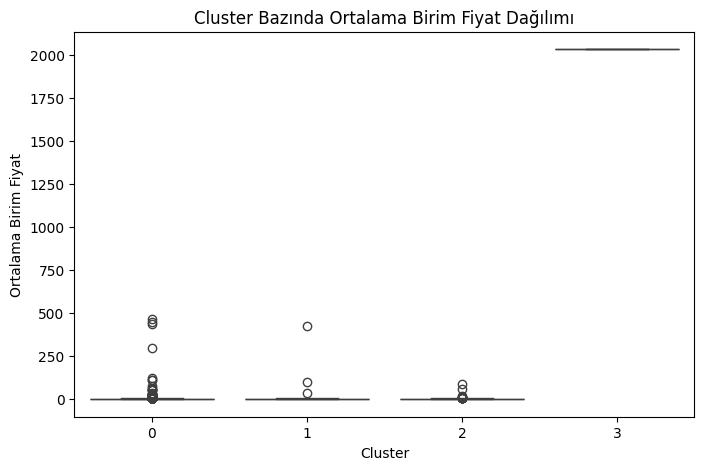

In [111]:
#distribution of average unit price by cluster
plt.figure(figsize=(8,5))
sns.boxplot(data=df_summary, x='Cluster', y='UnitPrice')
plt.title('Cluster Bazında Ortalama Birim Fiyat Dağılımı')
plt.xlabel('Cluster')
plt.ylabel('Ortalama Birim Fiyat')
plt.show()

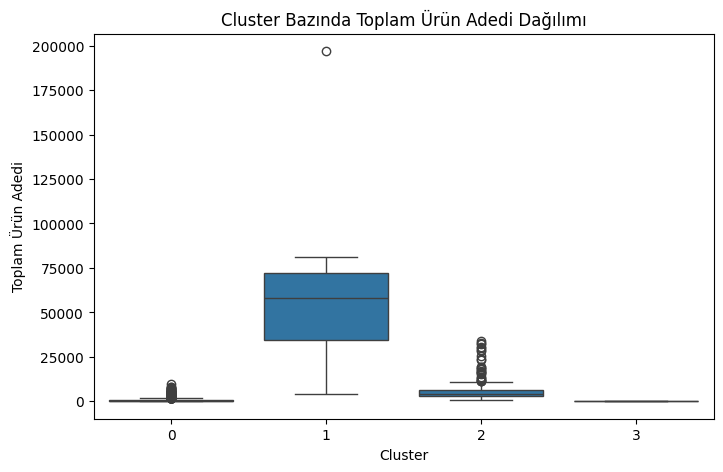

In [112]:
#distribution of total quantitity by cluster
plt.figure(figsize=(8,5))
sns.boxplot(data=df_summary, x='Cluster', y='TotalQuantity')
plt.title('Cluster Bazında Toplam Ürün Adedi Dağılımı')
plt.xlabel('Cluster')
plt.ylabel('Toplam Ürün Adedi')
plt.show()

In [128]:
#checking for different names about cluster.
print(df_summary.columns)
print(df_reduced.columns)

Index(['CustomerID', 'TotalQuantity', 'UnitPrice', 'NumTransactions',
       'TotalSpend', 'Cluster'],
      dtype='object')
Index(['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Year',
       'Month', 'Day', 'Hour'],
      dtype='object')


In [129]:
#to enrich the original detailed transaction data with cluster membership
df_clean = df_clean.merge(df_summary[['CustomerID', 'Cluster']], on='CustomerID', how='left')

In [131]:
#grouping the detailed transaction data. aggregating several metrics for each cluster
segment_behavior = df_clean.groupby('Cluster').agg({
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'StockCode': 'nunique'
}).rename(columns={
    'InvoiceNo': 'AvgPurchaseFrequency',
    'CustomerID': 'NumCustomers',
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AvgUnitPrice',
    'StockCode': 'UniqueProducts'
})

print(segment_behavior)

         AvgPurchaseFrequency  NumCustomers  TotalQuantity  AvgUnitPrice  \
Cluster                                                                    
0                       12339          4074        2617682      3.008341   
1                        1208            19        1110179      3.311127   
2                        4984           244        1439950      3.354998   
3                           1             1              1   2033.100000   

         UniqueProducts  
Cluster                  
0                  3607  
1                  2903  
2                  3127  
3                     1  


## **5. Visualizations**

- Bar charts illustrating average total spend, purchase frequency, unique products, and unit prices by segment.  
- Time series plots showing monthly total quantity and unique customer counts per segment.  
- Geographic choropleth maps visualizing customer counts by country.  
- Logarithmic scales used for clearer visualization of data with wide value ranges.

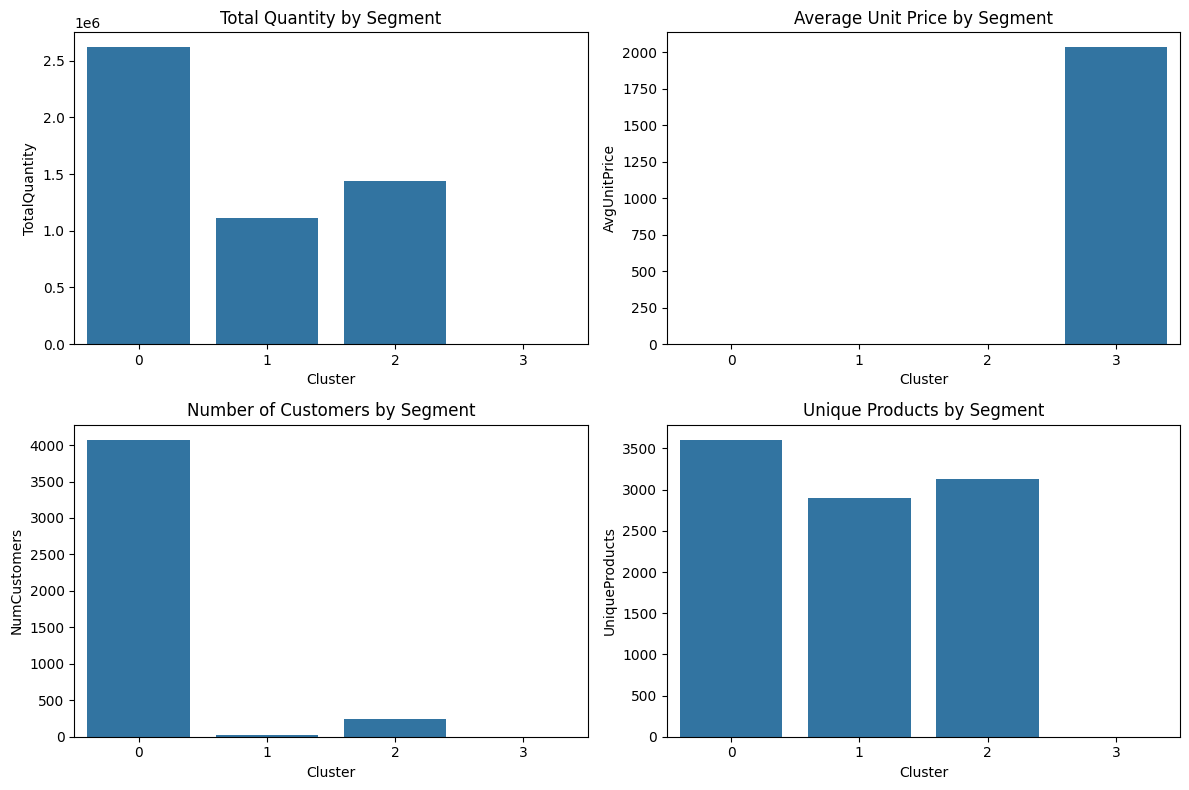

In [132]:
#plotted bar charts for different segments metrics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.barplot(x=segment_behavior.index, y='TotalQuantity', data=segment_behavior)
plt.title('Total Quantity by Segment')

plt.subplot(2,2,2)
sns.barplot(x=segment_behavior.index, y='AvgUnitPrice', data=segment_behavior)
plt.title('Average Unit Price by Segment')

plt.subplot(2,2,3)
sns.barplot(x=segment_behavior.index, y='NumCustomers', data=segment_behavior)
plt.title('Number of Customers by Segment')

plt.subplot(2,2,4)
sns.barplot(x=segment_behavior.index, y='UniqueProducts', data=segment_behavior)
plt.title('Unique Products by Segment')

plt.tight_layout()
plt.show()

In [46]:
print(df_clean.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Cluster_x', 'Cluster_y',
       'Cluster'],
      dtype='object')


In [134]:
#summarizes and profiles customer segments by their purchasing behavior.
segment_behavior = df_clean.groupby('Cluster').agg({
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'StockCode': 'nunique'
}).rename(columns={
    'InvoiceNo': 'AvgPurchaseFrequency',
    'CustomerID': 'NumCustomers',
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AvgUnitPrice',
    'StockCode': 'UniqueProducts'
})

print(segment_behavior)

         AvgPurchaseFrequency  NumCustomers  TotalQuantity  AvgUnitPrice  \
Cluster                                                                    
0                       12339          4074        2617682      3.008341   
1                        1208            19        1110179      3.311127   
2                        4984           244        1439950      3.354998   
3                           1             1              1   2033.100000   

         UniqueProducts  
Cluster                  
0                  3607  
1                  2903  
2                  3127  
3                     1  


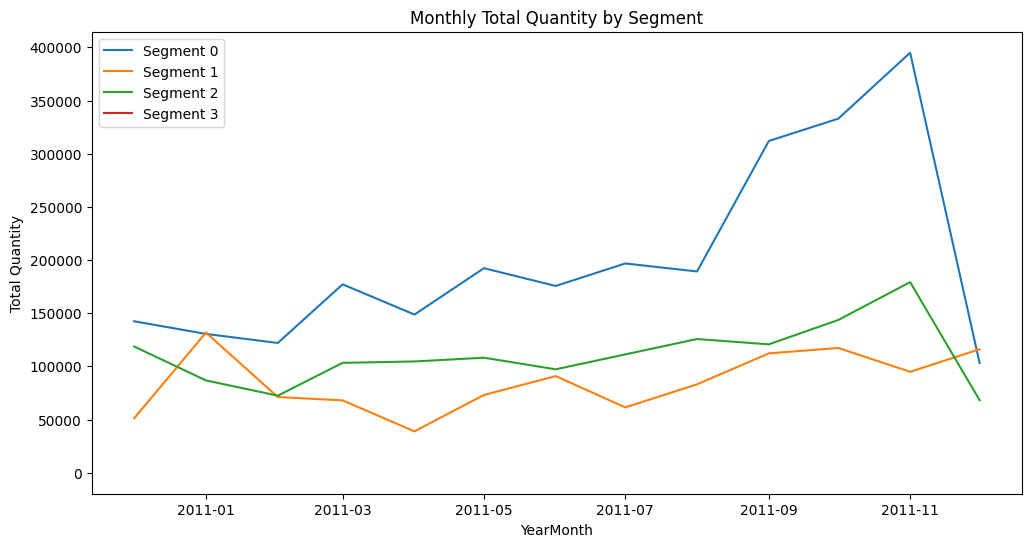

In [142]:
#Monthly total Quantitity by Segment
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for cluster in monthly_segment['Cluster_x'].unique():
    cluster_data = monthly_segment[monthly_segment['Cluster_x'] == cluster]
    plt.plot(cluster_data['YearMonth'], cluster_data['TotalQuantity'], label=f'Segment {cluster}')

plt.title('Monthly Total Quantity by Segment')
plt.xlabel('YearMonth')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

In [143]:
#checking cluster 3 because of the Monthly Total Quantity by Segment viz.
print(monthly_segment[monthly_segment['Cluster_x'] == 3])

    Cluster_x  YearMonth  TotalQuantity  NumUniqueCustomers
39          3 2011-09-01              1                   1


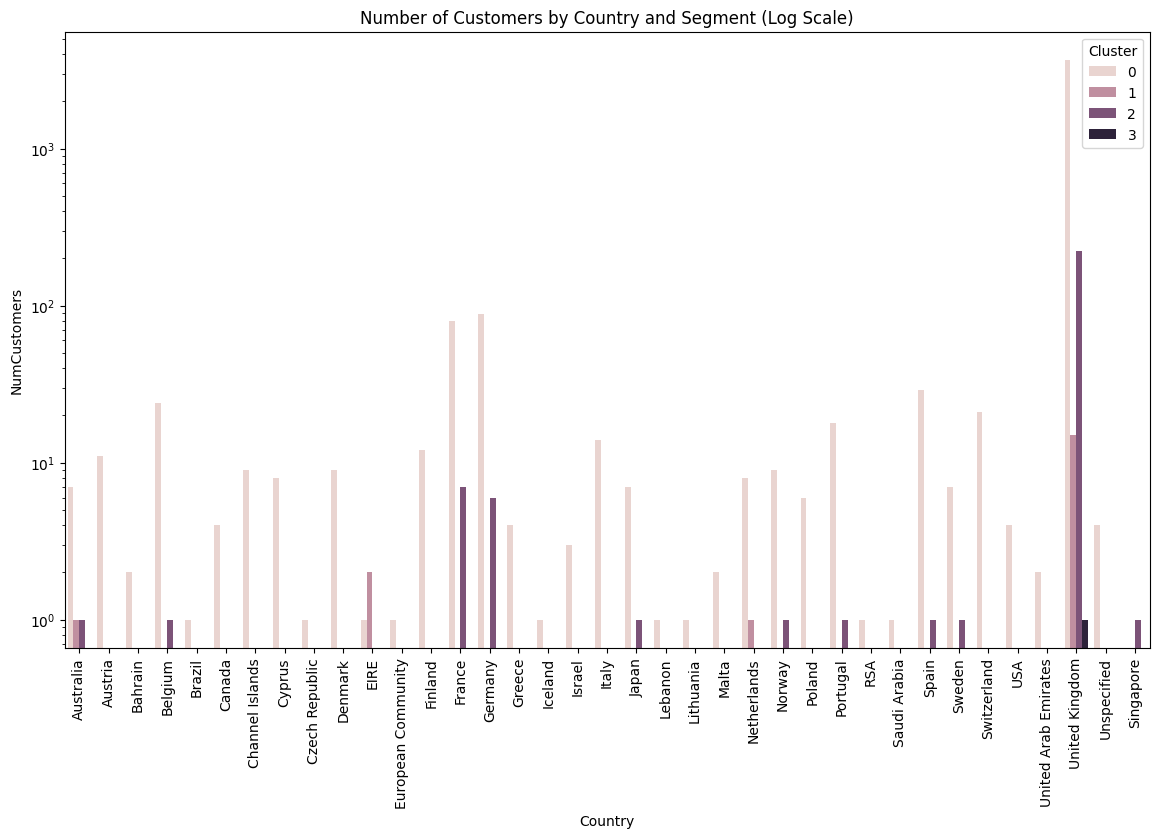

In [144]:
#Number of customers by country and segment Logaritmic Scale
plt.figure(figsize=(14,8))
sns.barplot(data=country_segment, x='Country', y='NumCustomers', hue='Cluster')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Number of Customers by Country and Segment (Log Scale)')
plt.show()

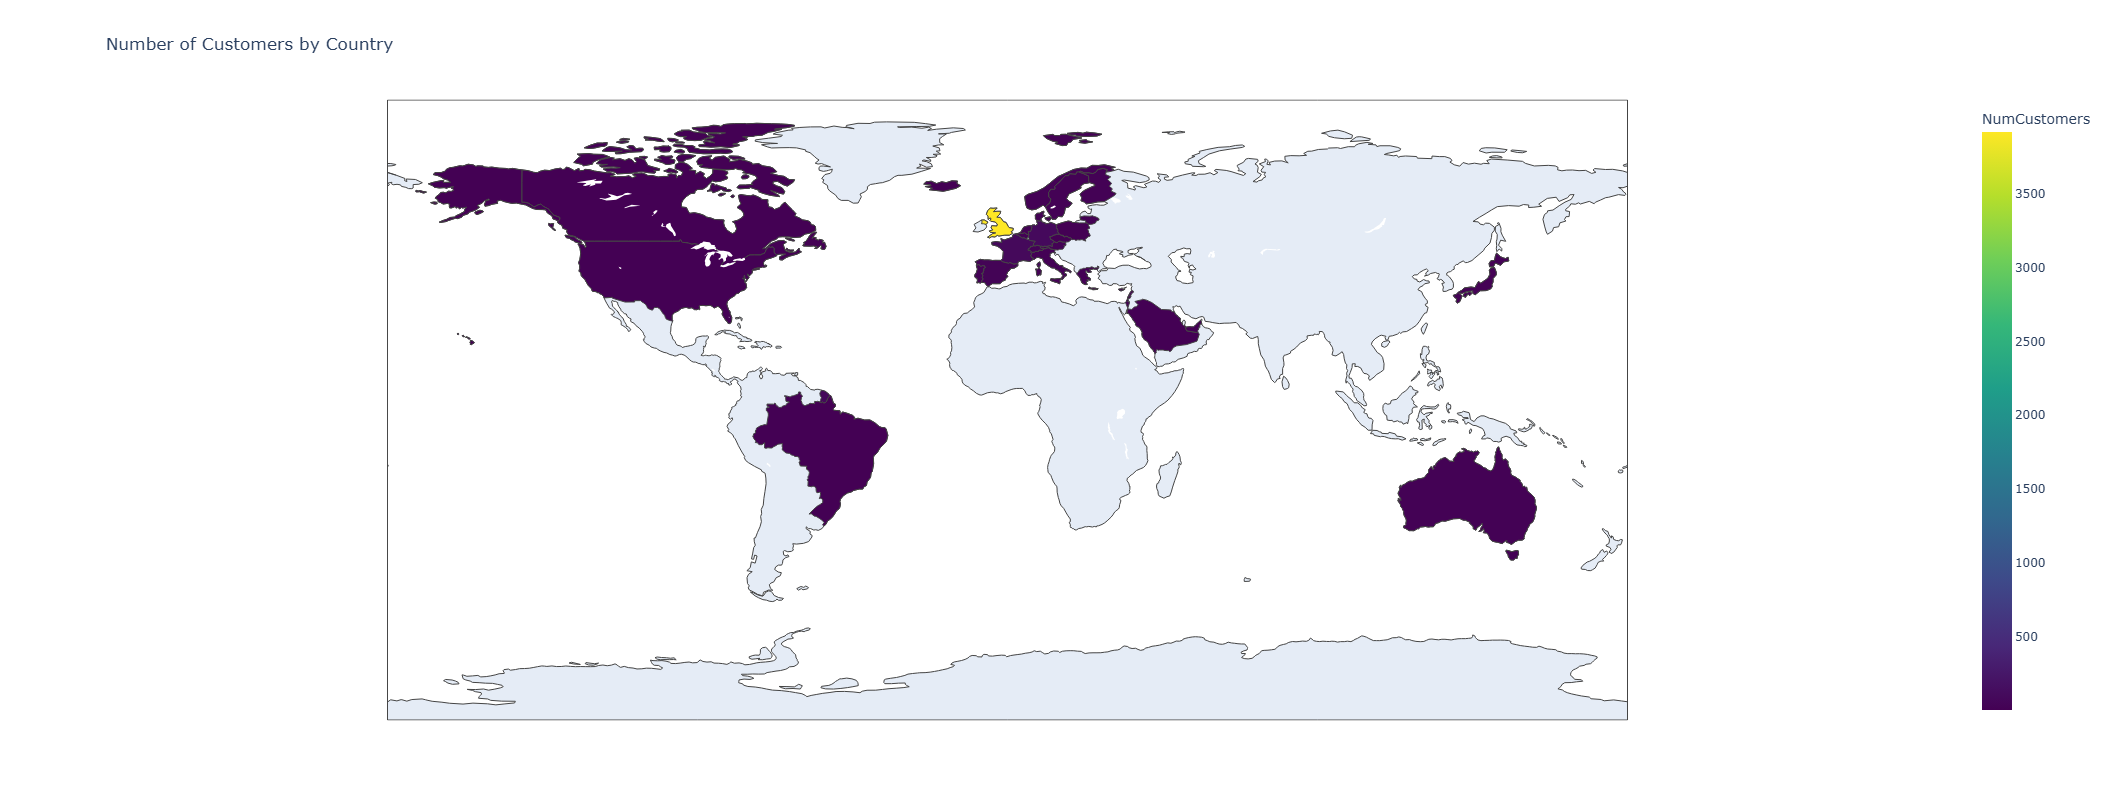

In [145]:
#Number of customers by Country
import plotly.express as px

df_country_total = country_segment.groupby('Country')['NumCustomers'].sum().reset_index()

fig = px.choropleth(
    df_country_total,
    locations='Country',
    locationmode='country names',
    color='NumCustomers',
    color_continuous_scale='Viridis',
    title='Number of Customers by Country'
)

fig.update_layout(width=1100, height=800)
fig.show()

In [150]:
df_reduced['YearMonth'] = pd.to_datetime(df_reduced[['Year', 'Month']].assign(DAY=1))

In [151]:
#Creates a monthly time series.
monthly_segment = df_reduced.groupby(['Cluster_x', 'YearMonth']).agg({
    'Quantity': 'sum',
    'CustomerID': 'nunique'  
}).rename(columns={
    'Quantity': 'TotalQuantity',
    'CustomerID': 'NumUniqueCustomers'
}).reset_index()

print(monthly_segment.head())

   Cluster_x  YearMonth  TotalQuantity  NumUniqueCustomers
0          0 2010-12-01         142391                 691
1          0 2011-01-01         130521                 562
2          0 2011-02-01         122003                 578
3          0 2011-03-01         177146                 776
4          0 2011-04-01         148720                 658


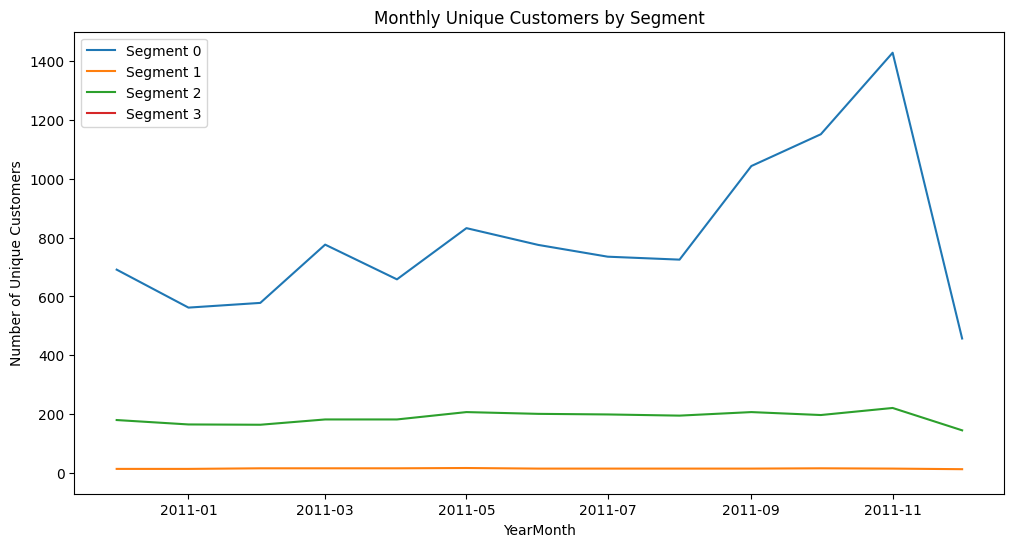

In [153]:
#Monthly Unique Customers by Segment
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for cluster in monthly_segment['Cluster_x'].unique():
    cluster_data = monthly_segment[monthly_segment['Cluster_x'] == cluster]
    plt.plot(cluster_data['YearMonth'], cluster_data['NumUniqueCustomers'], label=f'Segment {cluster}')

plt.title('Monthly Unique Customers by Segment')
plt.xlabel('YearMonth')
plt.ylabel('Number of Unique Customers')
plt.legend()
plt.show()

In [154]:
#checking cluster3 again
print(monthly_segment[monthly_segment['Cluster_x'] == 3])

    Cluster_x  YearMonth  TotalQuantity  NumUniqueCustomers
39          3 2011-09-01              1                   1


In [155]:
#ensured total spend was calculated for each segment
if 'TotalSpend' not in segment_behavior.columns:
        segment_behavior['TotalSpend'] = segment_behavior['TotalQuantity'] * segment_behavior['AvgUnitPrice']

segment_summary = segment_behavior[['AvgPurchaseFrequency', 'NumCustomers', 'TotalQuantity', 'AvgUnitPrice', 'UniqueProducts', 'TotalSpend']]

print(segment_summary)

print(segment_summary.describe())

print(segment_summary.groupby(segment_behavior.index).mean())

         AvgPurchaseFrequency  NumCustomers  TotalQuantity  AvgUnitPrice  \
Cluster                                                                    
0                       12339          4074        2617682      3.008341   
1                        1208            19        1110179      3.311127   
2                        4984           244        1439950      3.354998   
3                           1             1              1   2033.100000   

         UniqueProducts    TotalSpend  
Cluster                                
0                  3607  7.874881e+06  
1                  2903  3.675943e+06  
2                  3127  4.831029e+06  
3                     1  2.033100e+03  
       AvgPurchaseFrequency  NumCustomers  TotalQuantity  AvgUnitPrice  \
count              4.000000      4.000000   4.000000e+00      4.000000   
mean            4633.000000   1084.500000   1.291953e+06    510.693616   
std             5558.527563   1996.063877   1.077287e+06   1014.937601   
min    

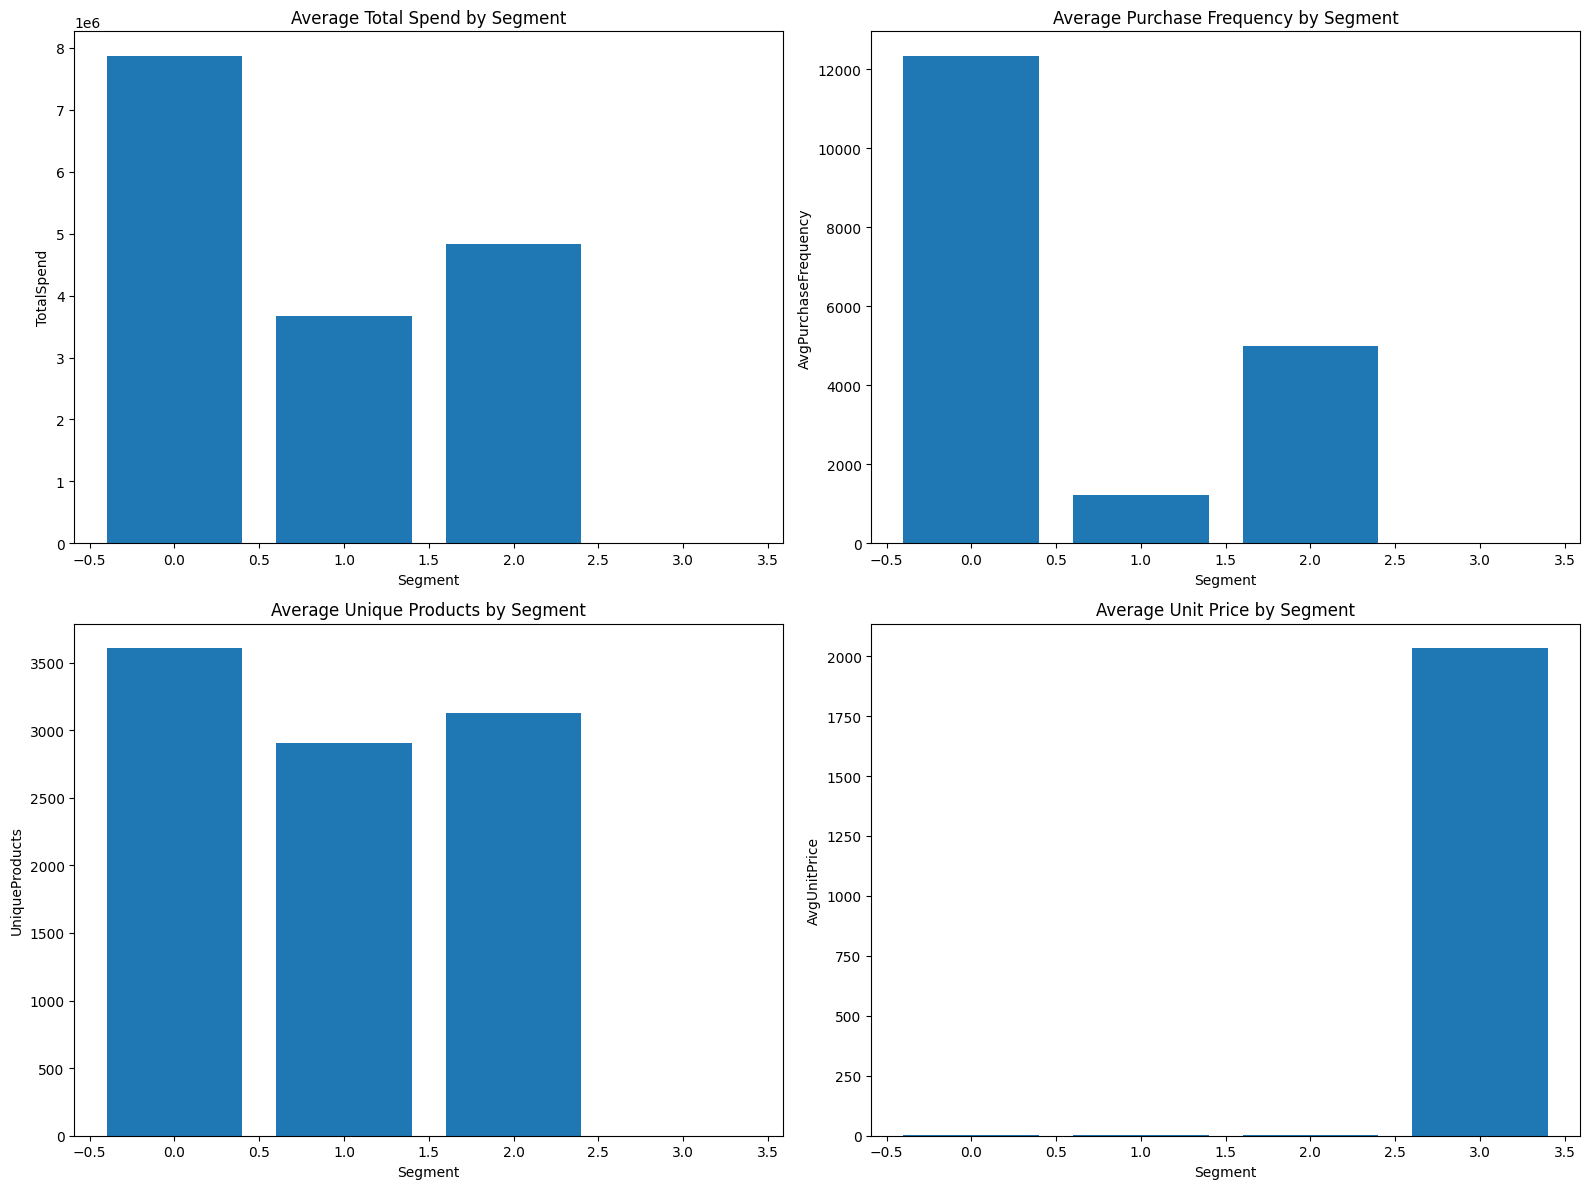

In [158]:
#Bar charts visuaalizing key metriics for each segment
import matplotlib.pyplot as plt
segment_behavior = segment_behavior.copy()
if 'TotalSpend' not in segment_behavior.columns:
    segment_behavior['TotalSpend'] = segment_behavior['TotalQuantity'] * segment_behavior['AvgUnitPrice']

metrics = ['TotalSpend', 'AvgPurchaseFrequency', 'UniqueProducts', 'AvgUnitPrice']
titles = ['Average Total Spend by Segment', 'Average Purchase Frequency by Segment', 'Average Unique Products by Segment', 'Average Unit Price by Segment']

plt.figure(figsize=(16, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.bar(segment_behavior.index, segment_behavior[metric])
    plt.title(titles[i-1])
    plt.xlabel('Segment')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

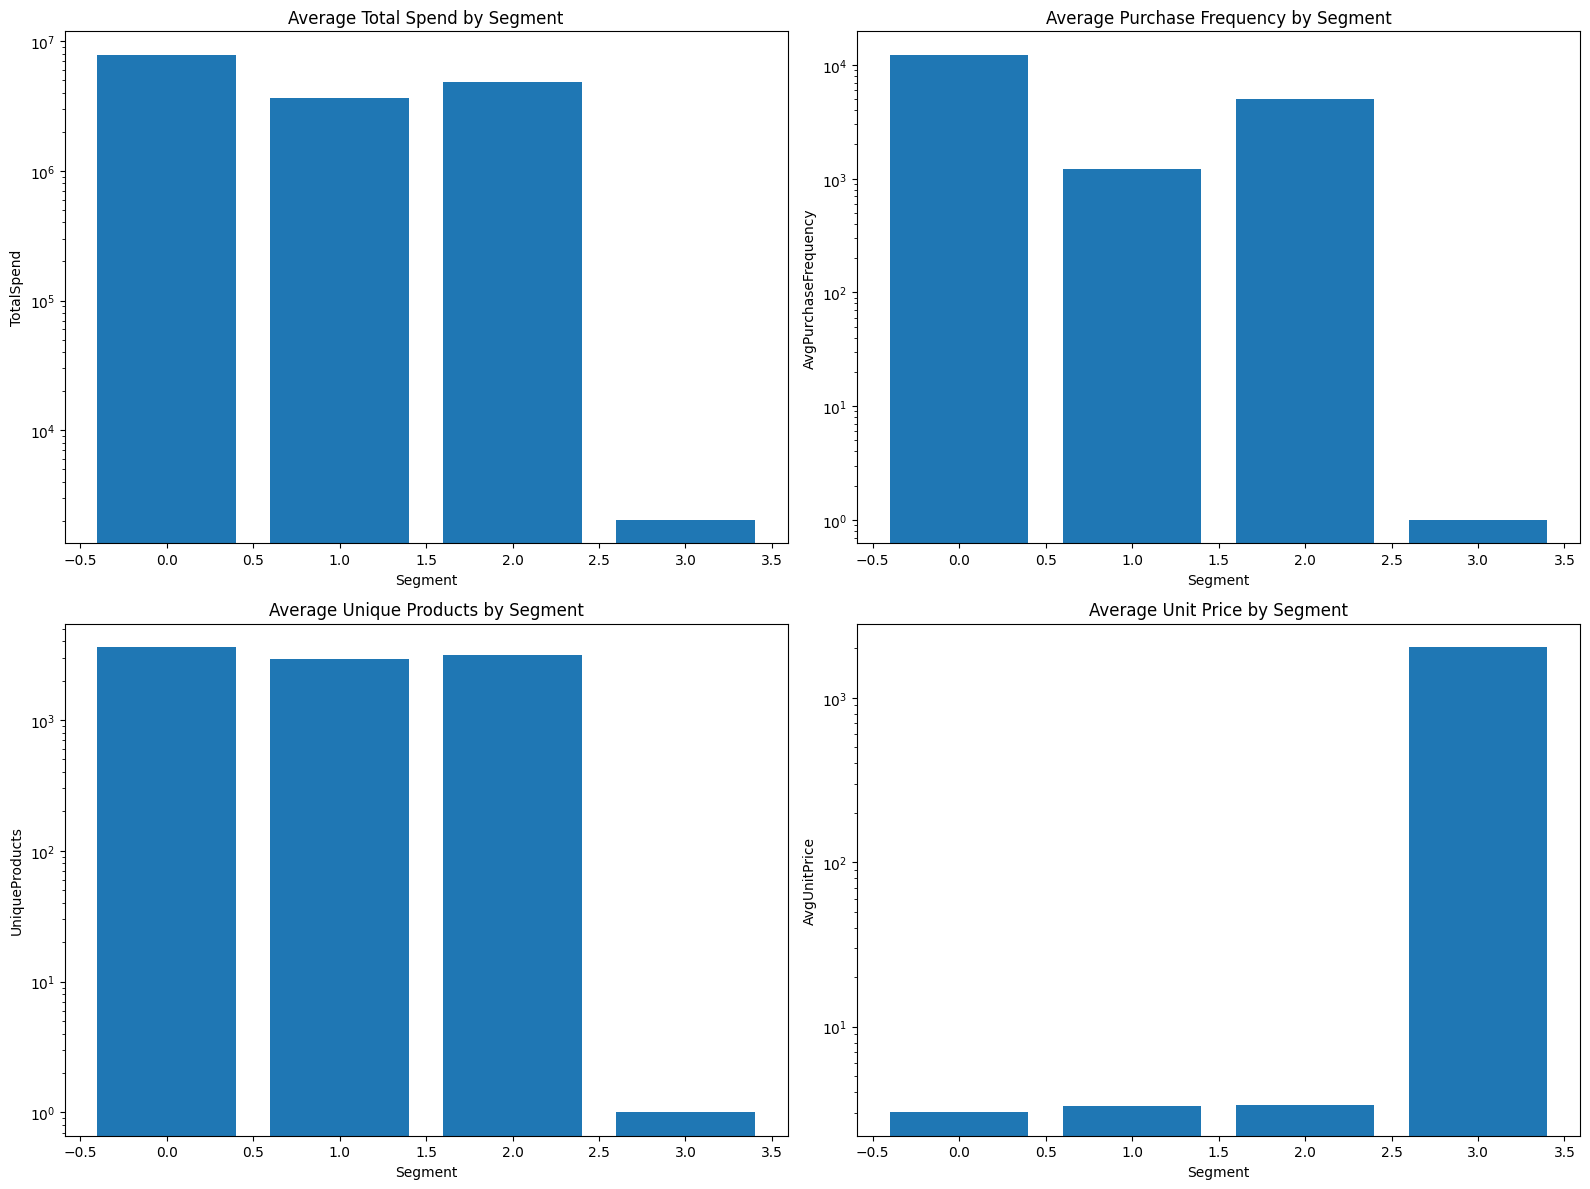

In [159]:
#Logaritmic bar charts visuaalizing key metriics for each segment
import matplotlib.pyplot as plt

segment_behavior = segment_behavior.copy()
if 'TotalSpend' not in segment_behavior.columns:
    segment_behavior['TotalSpend'] = segment_behavior['TotalQuantity'] * segment_behavior['AvgUnitPrice']

metrics = ['TotalSpend', 'AvgPurchaseFrequency', 'UniqueProducts', 'AvgUnitPrice']
titles = ['Average Total Spend by Segment', 'Average Purchase Frequency by Segment', 'Average Unique Products by Segment', 'Average Unit Price by Segment']

plt.figure(figsize=(16, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.bar(segment_behavior.index, segment_behavior[metric])
    plt.title(titles[i-1])
    plt.xlabel('Segment')
    plt.ylabel(metric)
    plt.yscale('log')

plt.tight_layout()
plt.show()


## **6. Conclusions and Recommendations**

- Identified key customer segments with distinct shopping patterns, enabling targeted marketing campaigns.  
- High-value customers (**Cluster 0**) show frequent purchases and high spend—focus on loyalty programs.  
- Niche or premium buyers (**Clusters 1 and 2**) demonstrate selective product choices and can be approached with personalized offers.  
- Outliers or low-activity clusters (**Cluster 3**) may need re-engagement strategies or could represent new customers.  
- Geographic insights reveal potential regional marketing opportunities.  
- Recommend continuous monitoring of segments and adapting strategies based on evolving customer behavior.

## Recommendations by Customer Segment

### Cluster 0 - High-Value Customers
- Implement exclusive loyalty programs and rewards to enhance retention.
- Offer personalized promotions and early access to new products.
- Maintain high service quality and regular engagement to maximize lifetime value.

### Cluster 1 - Niche Buyers
- Curate specialized product recommendations tailored to their selective preferences.
- Develop targeted marketing campaigns highlighting premium or unique product features.
- Encourage feedback to better understand niche needs and refine offerings.

### Cluster 2 - Premium Buyers
- Provide personalized concierge or VIP customer service.
- Introduce bundled offers and premium memberships to increase purchase frequency.
- Leverage premium branding in communications to reinforce exclusivity.

### Cluster 3 - Low-Activity / New Customers
- Design reactivation campaigns with introductory discounts or incentives.
- Focus on educational content to increase product awareness and usage.
- Monitor engagement closely and segment further if needed for targeted nurturing.

## **Appendix**

### Sample Code Snippet: K-Means Clustering

```python
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_summary['Cluster'] = clusters
